# **1. Setup**

# PARTE 1 - DESARROLLO

## Establecer Entorno de Trabajo

In [1]:
# Check python version
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### Instalacion de paquetes necesarios

In [3]:
# Install pytorch for python 3.10 with CUDA 11.8 support
!pip3 install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.2/819.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [4]:
!pip install Pillow==9.4.0
!pip show pillow #check pillow version

Name: Pillow
Version: 9.4.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: bokeh, dopamine_rl, fastai, imageio, imgaug, matplotlib, scikit-image, torchvision, wordcloud


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# !mkdir /content/gdrive/My\ Drive/P1aplicacionesIA

In [7]:
# !ls /content/gdrive/My\ Drive/P1aplicacionesIA

In [8]:
#move to a specific directory
import os
os.chdir('/content/gdrive/My Drive/P1aplicacionesIA/')
!pwd

/content/gdrive/My Drive/P1aplicacionesIA


# **2. Carga de conjuntos de datos/imágenes (datasets)**

## Manejo de Datasets


### Datasets por defecto

#### Descarga CIFAR10

In [37]:
import subprocess
import os
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

In [38]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
download_dir = './data' #download directory
trainset = torchvision.datasets.CIFAR10(root=download_dir, train=True, download=True, transform=transform) #train set
testset = torchvision.datasets.CIFAR10(root=download_dir, train=False, download=True, transform=transform) #test set

print('Train dataset with ' + str(len(trainset)) + ' images')
print('Test dataset with ' + str(len(testset)) + ' images')

Files already downloaded and verified
Files already downloaded and verified
Train dataset with 50000 images
Test dataset with 10000 images


In [39]:
# number of samples/images per group
batch_size = 6

#load & convert images to tensors in Python
trainloader = torch.utils.data.DataLoader(trainset, batch_size, shuffle=True, num_workers=2)
trainloader_len = len(trainloader)

testloader = torch.utils.data.DataLoader(testset, batch_size, shuffle=False, num_workers=2)
testloader_len = len(testloader)

classes = ('plane', 'car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Loaders done.')
print('Each batch with ' + str(batch_size) + ' samples/images')
print(f"Train dataset with {trainloader_len} batches")
print(f"Test dataset with {testloader_len} batches")
print('Available classes:')
print(classes)

Loaders done.
Each batch with 6 samples/images
Train dataset with 8334 batches
Test dataset with 1667 lotes
Available classes:
('plane', 'car', 'bird', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#### Visualización

In [40]:
# function to un-normalize and display an image
def imshow(img):
  img = img / 2 + 0.5 #desnormalizar
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

deer truck truck plane horse horse 

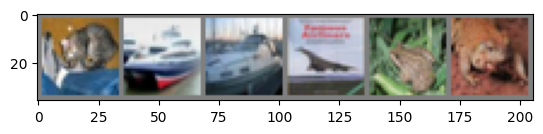

In [41]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Concatenate images
imgconcat = torchvision.utils.make_grid(images)

# Show image
imshow(imgconcat)

# Print labels
for i in range(batch_size):
  print(classes[labels[i]], end=' ')



### Bonus Transformaciones de Los Datos

 deer


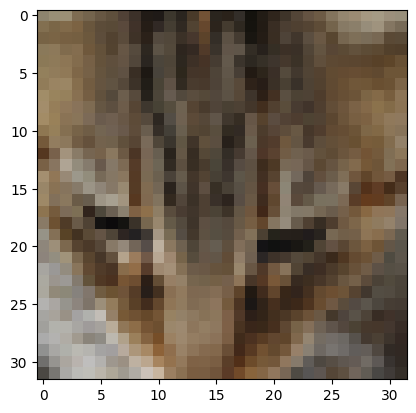

In [42]:
#load a sample batch from previous section
dataiter = iter(trainloader)
images, labels = next(dataiter)

#display first image of the batch
imshow(images[0])
print ('%5s' % classes[labels[0]])

 deer


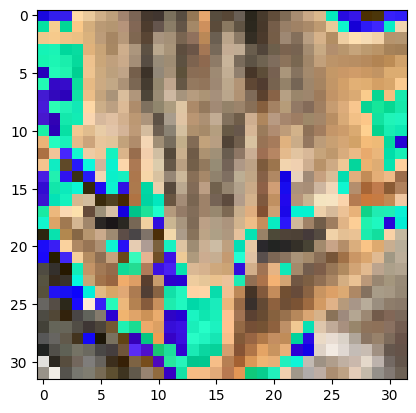

In [44]:
to_pil_image = transforms.ToPILImage()

img = to_pil_image(images[0])
imtran = transform(img)
imshow(imtran)
print ('%5s' % classes[labels[0]])

# **3. Definición de la red neuronal convolucional**

In [45]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    # Convolutional Layer
    self.conv1 = nn.Conv2d(3,16,3, padding=1)
    self.conv2 = nn.Conv2d(16,32,3,padding=1)
    self.conv3 = nn.Conv2d(32,64,3,padding=1)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*4*4,120)
    self.fc2 = nn.Linear(120, 60)
    self.fc3 = nn.Linear(60,10)
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):

    x =  self.pool(F.relu(self.conv1(x)))
    x =  self.pool(F.relu(self.conv2(x)))
    x =  self.pool(F.relu(self.conv3(x)))
    x =  x.view(-1,64*4*4)
    x =  self.dropout(x)
    x = F.relu(self.fc1(x))
    x =  self.dropout(x)
    x = F.relu(self.fc2(x))
    x =  self.dropout(x)
    x = self.fc3(x)
    return x


model = Net()
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (fc3): Linear(in_features=60, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [47]:
# Training the model
n_epochs = 30
model.train()

for epoch in range(n_epochs):
    running_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:     # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            running_loss = 0.0

    # Compute the accuracy on the training set
    correct1 = 0.0
    for data in trainloader:
        inputs, labels = data
        outputs = model(Variable(inputs))
        _, predicted = torch.max(outputs.data, 1)
        correct1 += (predicted == labels).sum().item()

    correct2 = 0.0
    for data in testloader:
        inputs, labels = data
        outputs = model(Variable(inputs))
        _, predicted = torch.max(outputs.data, 1)
        correct2 += (predicted == labels).sum().item()

    print(f'Epoch: {epoch + 1}')
    print(f'Average accuracy on the training set: {correct1 / len(trainset)}')
    print(f'Average accuracy on the test set: {correct2 / len(testset)}')


    # Evaluate the model
    model.eval()

    for data, target in testloader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item()

    # Calculate the average loss
    running_loss /= len(trainloader.dataset)
    test_loss /= len(testloader.dataset)

    print(f'Epoch: {epoch + 1}, Training Loss: {running_loss}, Test Loss: {test_loss}')



# # Save the model
# PATH = './cifar_net.pth'
# torch.save(model.state_dict(), PATH)

print('Finished Training')

[1, 2000] loss: 2.290027562022209
[1, 4000] loss: 2.0190899024605753
[1, 6000] loss: 1.8048909222185612
[1, 8000] loss: 1.680369874984026
Epoch: 1
Average accuracy on the training set: 0.39354
Average accuracy on the test set: 0.3918


<ipython-input-47-6d1c39cbd8a7>:49: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)


Epoch: 1, Training Loss: 0.010778877415657043, Test Loss: 0.25604259900450704
[2, 2000] loss: 1.4888835453391076
[2, 4000] loss: 1.3957219253480435
[2, 6000] loss: 1.284238545715809
[2, 8000] loss: 1.2290446592196822
Epoch: 2
Average accuracy on the training set: 0.5846
Average accuracy on the test set: 0.576
Epoch: 2, Training Loss: 0.008005805959701538, Test Loss: 0.19425799431800841
[3, 2000] loss: 1.1315023749023676
[3, 4000] loss: 1.0858975495956837
[3, 6000] loss: 1.0310169589817524
[3, 8000] loss: 0.9782059528212994
Epoch: 3
Average accuracy on the training set: 0.66972
Average accuracy on the test set: 0.6457
Epoch: 3, Training Loss: 0.006508630061000585, Test Loss: 0.1696136837296188
[4, 2000] loss: 0.9221344244852662
[4, 4000] loss: 0.8894605506174267
[4, 6000] loss: 0.8675466076284647
[4, 8000] loss: 0.8583699518553912
Epoch: 4
Average accuracy on the training set: 0.7311
Average accuracy on the test set: 0.6906
Epoch: 4, Training Loss: 0.005604440536666661, Test Loss: 0.147

---